## How life burns your pockets during medical emergency?

This project is mainly focussed on **Storytelling** from a small dataset. The main aim of the project is to bring out the fun of data exploration in a small dataset. Through multiple graphs and plots I will try to present the whole data and their interaction with other variable in a lucid manner. 

The data set is sourced from Kaggle and it seems like a abridged version of some insurance company's database. The main aim of the project with the data is to find the cost's dependencies of factors like BMI or body mass index, smoking habits, age and no of childrens and also roughly touches on the average spendings of males and females based on the above mentioned factors.

So without much ado lets begin the project by importing some of our dependencies. Following a brief description and their need in this project:-
1. OS: for file navigation from storage devices
2. Numpy for array and calculations
3. Pandas for data management including dataframes and series
4. Matplotlib and its subordinates like Pyplot, Style, MAXNLocator for plotting, style and Ticks
5. Sklearns StandardScaler for Data scaling
6. Sklearns KMeans for K-menas clustering
7. Sklearns Silhouette_Samples and Silhouette_score are for calculating silhouette scores for each individual and whole data set respectively.
8. Statsmodel Ols (lowercase) for R style Oridinary Least sqaures analysis to find the Pvalues for our hypothesis.

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
from statsmodels.formula.api import ols

### Data Insites

In [2]:
os.chdir="D:/Docs/Education/Data Science/Python projects/Analytics Vidya and Kaggle/Cluster 2 medical"

In [3]:
ls

 Volume in drive D is Data
 Volume Serial Number is DE63-80E0

 Directory of D:\Docs\Education\Data Science\Python projects\Analytics Vidya and Kaggle\Cluster 2 medical

01-08-2020  19:12    <DIR>          .
01-08-2020  19:12    <DIR>          ..
28-07-2020  20:31    <DIR>          .ipynb_checkpoints
27-09-2019  17:19            55,628 insurance.csv
01-08-2020  19:12         1,032,283 Patients classification.ipynb
               2 File(s)      1,087,911 bytes
               3 Dir(s)  602,707,062,784 bytes free


In [4]:
raw_data=pd.read_csv("insurance.csv")
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We load the data using Pandas read_csv. So one the first glace we see that our data has a shape of 1338,7 and has a mixed data type categorical and continuous. More overview of the data are follows:-

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


So we have around 3 object variables and 4 continuous variables and all the categories are non-null.

In [6]:
raw_data_c=raw_data.drop(["sex", "smoker", "region"], axis=1).copy() #only continuous variable dataset will be used for plots

In [7]:
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the desription of data we find except *Charges* other don't have much **outliers**

In [8]:
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Confirmation that no **NULL values in out dataset**

### Basic Histogram

**To find the nature of data**

The basic histogram, called by the **hist()** function gives a visual represention of the distribution of the data based on the *Normal distribution*. From this graph we can understand:-
1. Data type of each variable: "Continuous variables" will have a continuous normal distribution curve. "Categorical variable" will have distinct plots.
2. Skewness of data highlights the presence of **outliers**. Here we note **Charges** and **Age** have outliers where as BMI doesn't.
3. Region is categorical

Text(0.5, 0, 'Region')

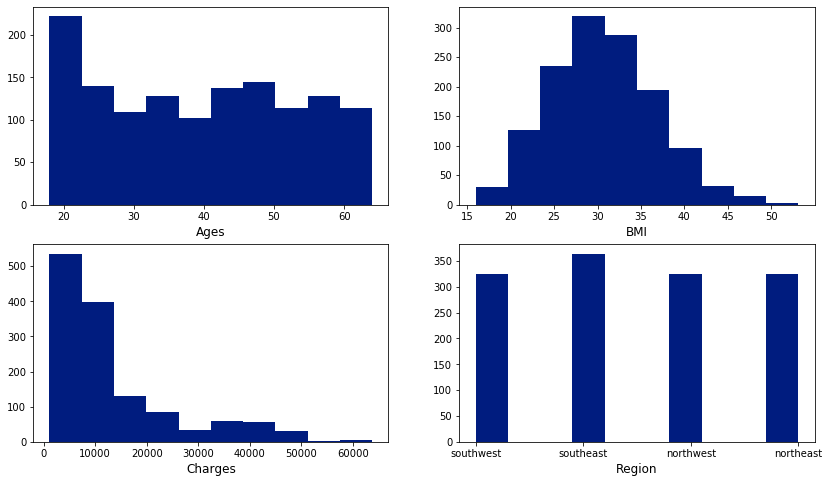

In [9]:
plt.figure(figsize=(14,8))
style.use("seaborn-dark-palette")
plt.subplot(2,2,1)
plt.hist(raw_data["age"])
plt.xlabel("Ages", fontsize=12)
plt.subplot(2,2,2)
plt.hist(raw_data["bmi"])
plt.xlabel("BMI", fontsize=12)
plt.subplot(2,2,3)
plt.hist(raw_data["charges"])
plt.xlabel("Charges", fontsize=12)
plt.subplot(2,2,4)
plt.hist(raw_data["region"])
plt.xlabel("Region", fontsize=12)

### Correlation

In [10]:
corr_mat=raw_data_c.corr()
corr_mat

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### Plotting of Correlation plot

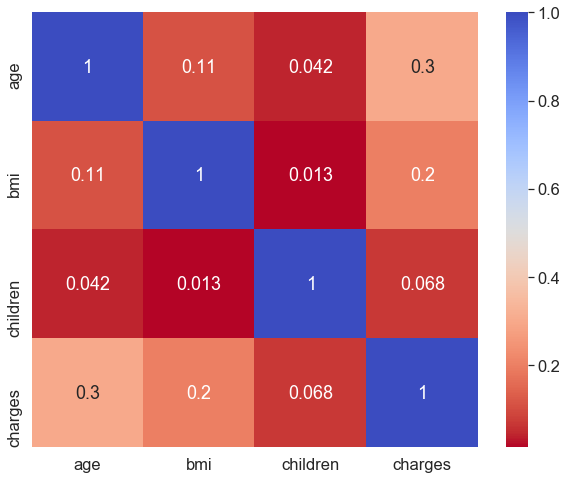

In [11]:
plt.figure(figsize=(10,8))
corar=np.array(corr_mat.values)
sns.set(font_scale=1.5)
sns.heatmap(corr_mat, annot=corar,cmap="coolwarm_r")

From correlation plot we can see **age** and **charges** have very slight positive correlation with **charges** which we will try to prove in due course.

In [12]:
raw_data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

### Relationship between Age and Charges.

We first convert the age into bins/groups of categorical variables like Child, Young Adult, Adult and Old to analyse its relationship with medical expenses "charges".

In [13]:
raw_data.loc[(raw_data.age>17) & (raw_data.age<=30), "age_cat"]="Young Adult"
raw_data.loc[(raw_data.age>30) & (raw_data.age<=59), "age_cat"]="Adult"
raw_data.loc[(raw_data.age>59), "age_cat"]="Old"
raw_data

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Adult
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult


Adult          780
Young Adult    444
Old            114
Name: age_cat, dtype: int64


([<matplotlib.patches.Wedge at 0x1ecbf613088>,
 [Text(-0.30922189662362254, 1.159474802938162, 'Young Adult'),
  Text(-0.007748139924787676, -1.0999727116286595, 'Adult'),
  Text(1.0608289775377782, -0.29093277645557974, 'Old')],
 [Text(-0.18037943969711315, 0.6763603017139278, '58.3%'),
  Text(-0.004226258140793277, -0.5999851154338142, '33.2%'),
  Text(0.5786339877478789, -0.1586906053394071, '8.5%')])

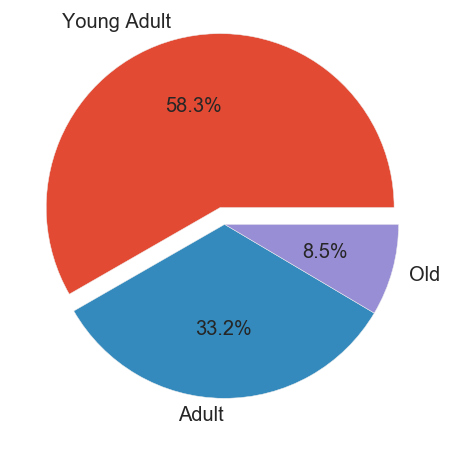

In [14]:
labels=raw_data.age_cat.unique().tolist()
count=raw_data.age_cat.value_counts()
print(count)
count=count.values
style.use("ggplot")
plt.figure(figsize=(8,8))
explode=(0.1,0,0)
plt.pie(count, labels=labels,explode=explode, autopct="%1.1f%%", textprops={'fontsize': 20})

The pie chart shows that our datasets has more Children and Young adults by count than adult and old.

<BarContainer object of 3 artists>

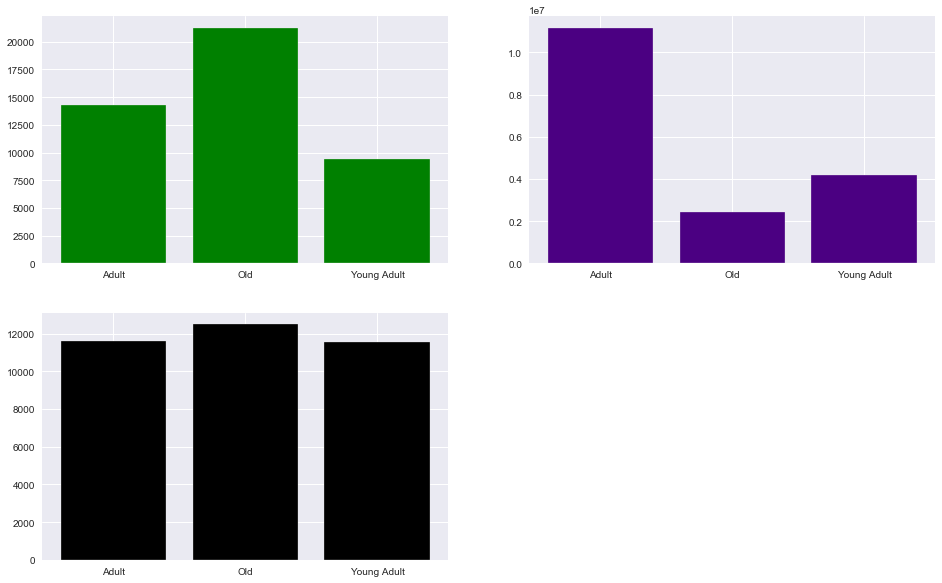

In [15]:
charge_avg_age=raw_data.groupby("age_cat")["charges"].mean()
labels_avg=charge_avg_age.keys()
charge_avg_age=charge_avg_age.tolist()

charge_sum_age=raw_data.groupby(["age_cat"])["charges"].sum()
labels_sum=charge_sum_age.keys()
charge_sum_age=charge_sum_age.tolist()

charge_std_age=raw_data.groupby(["age_cat"])["charges"].std()
labels_std=charge_std_age.keys()
charge_std_age=charge_std_age.tolist()


style.use("seaborn")
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.bar(labels_avg, charge_avg_age, color="green")
plt.subplot(2,2,2)
plt.bar(labels_sum, charge_sum_age, color="indigo")
plt.subplot(2,2,3)
plt.bar(labels_sum, charge_std_age, color="black")

From the above three bar plots we note the following:-

1. **Adults** comprises of 33.2% of the whole data set and thus sum total of their medical expenses is the highest but the mean cost per adult patient is **less than \$15,000** with a standard deviation of **\$12,000**. Adult age ranges from 30 to 59 with critical age starts post 59 where lots of ailments crop up due to work stress and socio-environmental factors. 

2. **Young Adult** is the age ranges from 18 to 30. A age when human body is at its peak. With a 58.3%  of Young adults representation still get lowest total. With a mean of around **less than \$10,000** and standard deviation of around **\$10,000**

3. **Old** age is the age where the medical cost becomes the primary expenditure and its evident by the fact that the mean cost is among the highest which shoots **above \$20,000** with a standard deviation of **\$13,000**. 

### Relationship between Sex and Charges

From the hist() plot we have seen that charges have outliers so we do a log transformation of charges to get rid of the impact of outliers.

In [16]:
raw_data["log_charges"]=np.log(raw_data["charges"])
raw_data 

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867


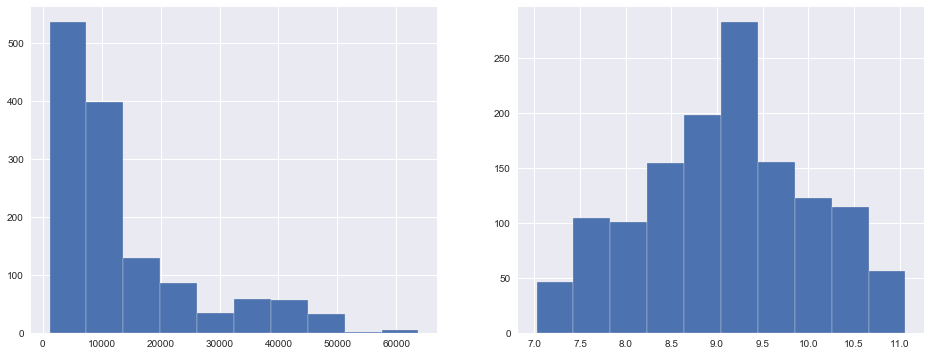

In [17]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
raw_data["charges"].hist()


plt.subplot(1,2,2)
raw_data["log_charges"].hist()

We plot a scatter box plot or **Swarm** plot of both **Charges** and **log charges** comparing with both the **genders** and observe the following.

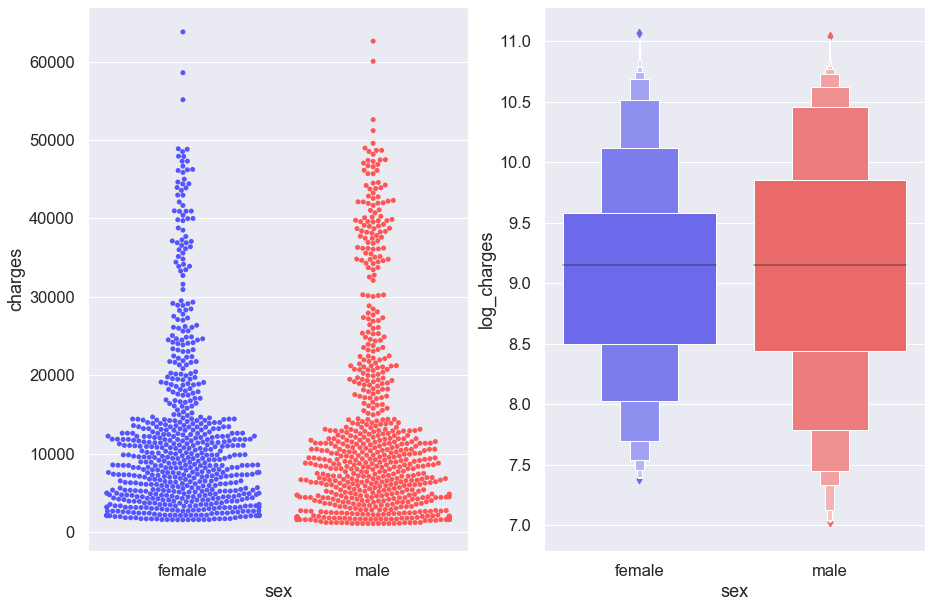

In [18]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.swarmplot(raw_data["sex"], raw_data["charges"], palette ="seismic")
plt.subplot(1,2,2)
sns.boxenplot(raw_data["sex"], raw_data["log_charges"], palette ="seismic")

The information about charges gathered from the swarm plot and the boxen plot (both are special cases of box plot) shows independency of charges on gender. With the mean lying around \$10,000.

### Relationship between BMI and Gender

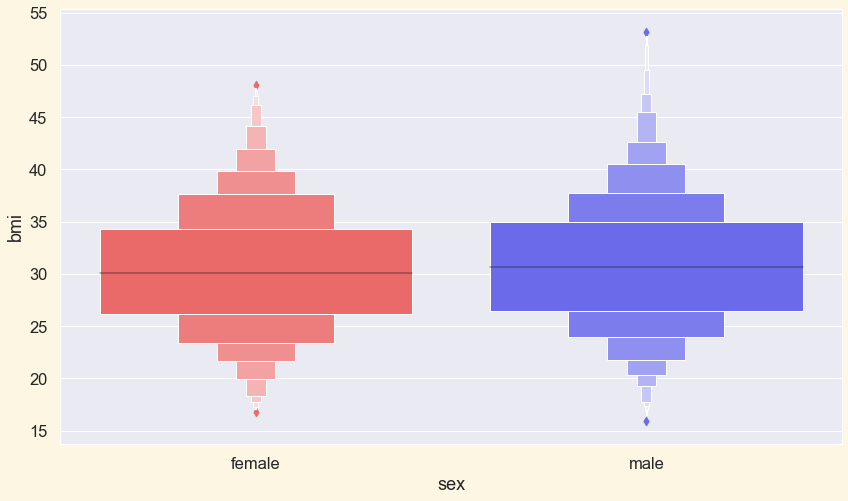

In [47]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
sns.boxenplot(raw_data["sex"], raw_data["bmi"], palette ="seismic_r")

The distribution of BMI has a mean of around of 30 with upper quartile ranges from 34 to 35 and lower quartile ranges from 25 for both the gender. Also male genders has outliers suggest by few BMI over 50.

In [21]:
raw_data.loc[(raw_data.age<19), "bmi_cat"]="Underweight"
raw_data.loc[(raw_data.age>=19) & (raw_data.age<=25), "bmi_cat"]="Normal"
raw_data.loc[(raw_data.age>25) & (raw_data.age<=30), "bmi_cat"]="Overweight"
raw_data.loc[(raw_data.age>30), "bmi_cat"]="Obese"
raw_data

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Normal
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Underweight
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Overweight
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Obese
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Obese
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927,Underweight
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233,Underweight
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867,Normal


<BarContainer object of 4 artists>

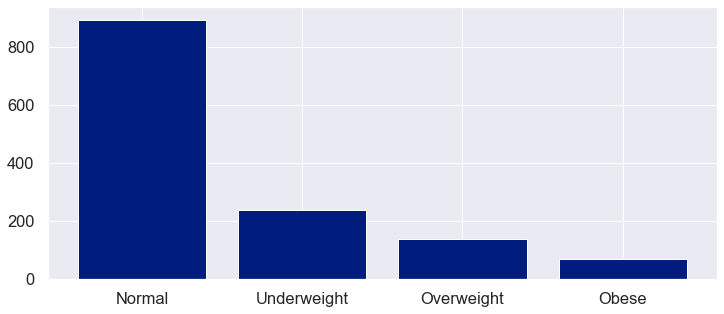

In [22]:
bmi_val=raw_data["bmi_cat"].value_counts()
bmi_val=bmi_val.tolist()
style.use("seaborn-dark-palette")
labels=raw_data["bmi_cat"].unique()
plt.figure(figsize=(12,5))
plt.bar(labels, bmi_val)

### Relationship between BMI and Charges

<BarContainer object of 4 artists>

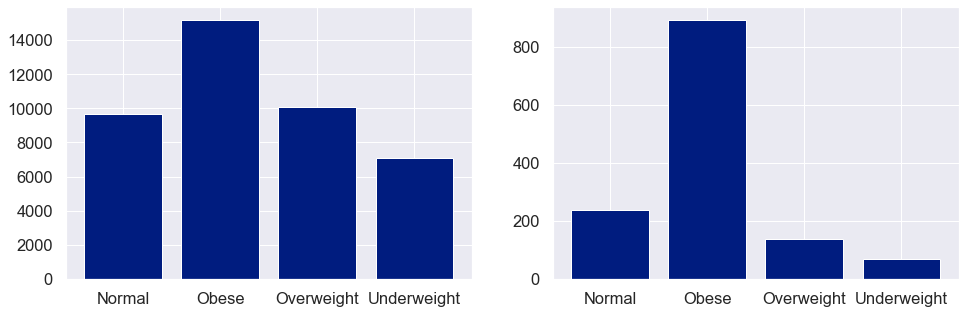

In [53]:
bmi_avg_charge=raw_data.groupby("bmi_cat")["charges"].mean()
labels_a=bmi_avg_charge.keys()
bmi_avg_charge=bmi_avg_charge.tolist()

bmi_count_charge=raw_data.groupby("bmi_cat")["charges"].count()
labels_c=bmi_count_charge.keys()
bmi_count_charge=bmi_count_charge.tolist()


style.use("seaborn-dark-palette")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.bar(labels_a, bmi_avg_charge)

plt.subplot(1,2,2)
plt.bar(labels_c, bmi_count_charge)


From the above plots we can see obesity has quite a impact on medical cost. Our datset has high number of Obese patients and also the mean cost is above \$14,000. Thus its better to keep our weights under control.

### Relationship between Smoking and Charges

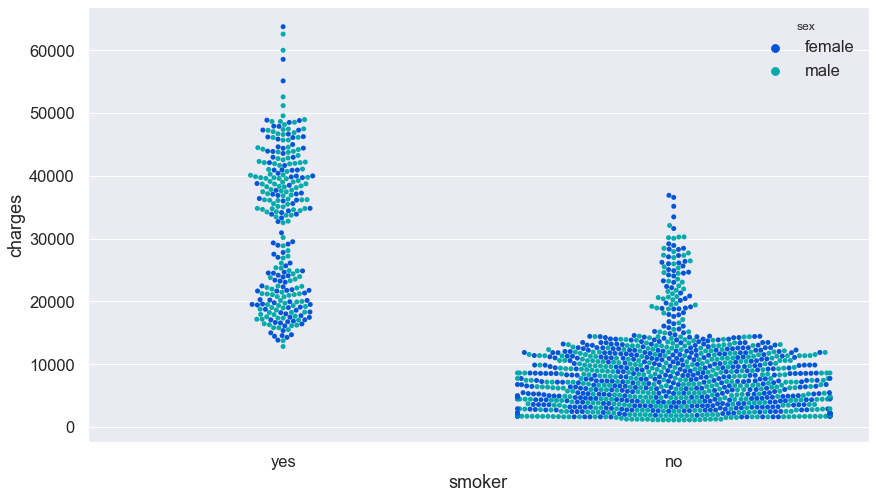

In [54]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
sns.swarmplot(raw_data["smoker"], raw_data["charges"],hue=raw_data["sex"], palette="winter")

bmi_cat        Normal         Obese    Overweight   Underweight
smoker                                                         
no        4248.268569  10373.029092   5485.185211   3215.162259
yes      28490.498279  34450.257426  26649.542370  25473.730221


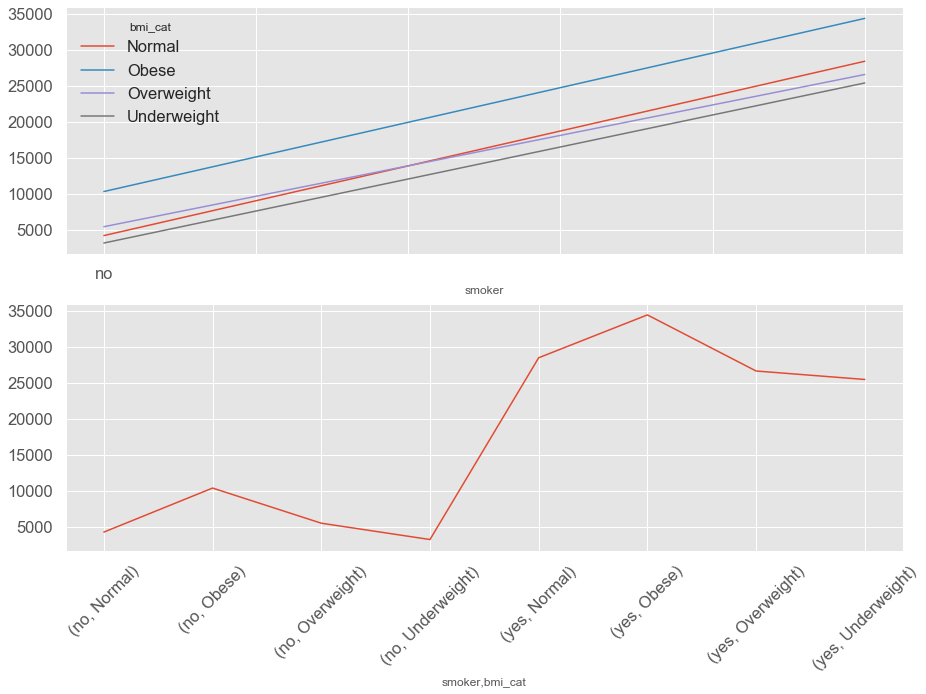

In [25]:
plt.figure(figsize=(15,10))
style.use("ggplot")
ax=plt.subplot(2,1,1)
smk_bmi=raw_data.groupby(["smoker", "bmi_cat"])["charges"].mean().unstack()
print(smk_bmi)
smk_bmi.plot(ax=ax)

ax=plt.subplot(2,1,2)
smk_bmi=raw_data.groupby(["smoker", "bmi_cat"])["charges"].mean().plot(ax=ax)
ax.tick_params('x',labelrotation=45)

From all the 3 graphs we note that Smoking and medical cost as direct relationship. Smoker tend to spend more on medical expenses that non-smoker. Which also indirectly suggests that smoker tend to develop more medical complication than non smokers.

### Standardization of Data

Standard scaling is required to bring all the variables to the same page. *BMI* and *Age* range in tens where as *Children* range in once while *Charges* ranged in 5 digits. Thus to keep all on same page we use the standard scaler.

Standardize features by removing the mean and scaling to unit variance

$$z=(x-u)/sd$$

In [26]:
raw_data_c

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [27]:
std_scl=StandardScaler()
raw_data_std=std_scl.fit_transform(raw_data_c)
print("columns as age, bmi. children, charges")
print(raw_data_std)

columns as age, bmi. children, charges
[[-1.43876426 -0.45332    -0.90861367  0.2985838 ]
 [-1.50996545  0.5096211  -0.07876719 -0.95368917]
 [-0.79795355  0.38330685  1.58092576 -0.72867467]
 ...
 [-1.50996545  1.0148781  -0.90861367 -0.96159623]
 [-1.29636188 -0.79781341 -0.90861367 -0.93036151]
 [ 1.55168573 -0.26138796 -0.90861367  1.31105347]]


In [28]:
bmi_charg_c=raw_data_std[:,[1,3]]
print(bmi_charg_c)
print(bmi_charg_c.shape)

[[-0.45332     0.2985838 ]
 [ 0.5096211  -0.95368917]
 [ 0.38330685 -0.72867467]
 ...
 [ 1.0148781  -0.96159623]
 [-0.79781341 -0.93036151]
 [-0.26138796  1.31105347]]
(1338, 2)


### Clustering 

Using KMeans and Silhoutte scores

To find the best number of cluster (n_clusters=k) we run a for-loop and compute the WSS (Within sum of squares) Elbow method and Silhoutte scores for each "k".

**BMI**

In [29]:
wss=[]
sil=[]
for k in range(2,16):
    kmeans=KMeans(n_clusters=k, random_state=1, n_jobs=-2).fit(bmi_charg_c)
    wss.append(kmeans.inertia_)
    labels=kmeans.labels_
    silhoutte=silhouette_score(bmi_charg_c, labels, metric = 'euclidean')
    sil.append(silhoutte)

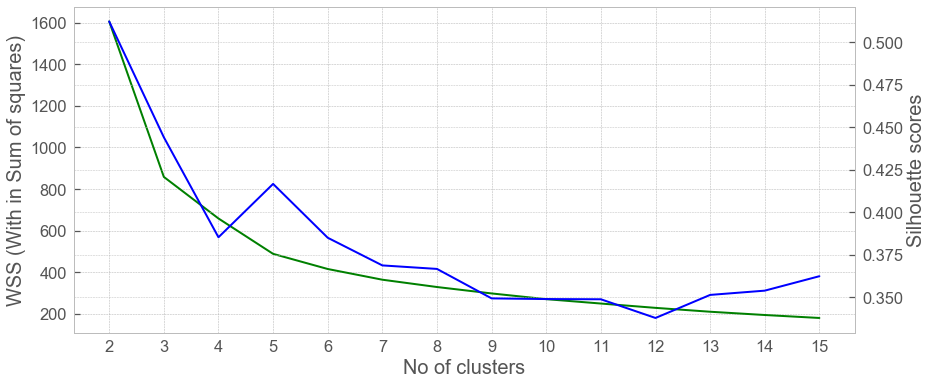

In [30]:
k=range(2,16)
style.use("bmh")
fig,ax=plt.subplots(figsize=(14,6))
ax.set_facecolor("white")
ax.plot(k, wss, color="green")
ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True))
ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS (With in Sum of squares)", fontsize=20)
ax2=ax.twinx()
ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)
ax2.grid(True,color="silver")
plt.show()

From the plot we see the "elbow" at 3 and silhouutee score almost best at that point.

In [31]:
k=3
kmeans=KMeans(n_clusters=k, random_state=1).fit(bmi_charg_c)
clusters=kmeans.labels_
centrids=kmeans.cluster_centers_
raw_data["clusters"]=clusters
raw_data

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Normal,1
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Underweight,0
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Overweight,0
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Obese,1
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Obese,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661,Obese,0
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927,Underweight,0
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233,Underweight,0
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867,Normal,1


In [32]:
raw_data2=raw_data.sort_values(["clusters"]).copy()

In [33]:
for i in range(0,k+1):
    raw_data2["clusters"]=raw_data2["clusters"].replace(i, chr(i+65))
    
raw_data2

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat,clusters
945,56,female,35.80,1,no,southwest,11674.13000,Adult,9.365131,Obese,A
449,35,male,38.60,1,no,southwest,4762.32900,Adult,8.468492,Obese,A
895,61,female,44.00,0,no,southwest,13063.88300,Old,9.477607,Obese,A
894,62,male,32.11,0,no,northeast,13555.00490,Old,9.514511,Obese,A
1217,29,male,37.29,2,no,southeast,4058.11610,Young Adult,8.308474,Overweight,A
...,...,...,...,...,...,...,...,...,...,...,...
803,18,female,42.24,0,yes,southeast,38792.68560,Young Adult,10.565987,Underweight,C
770,61,male,36.10,3,no,southwest,27941.28758,Old,10.237861,Obese,C
759,18,male,38.17,0,yes,southeast,36307.79830,Young Adult,10.499788,Underweight,C
615,47,female,36.63,1,yes,southeast,42969.85270,Adult,10.668254,Obese,C


In [34]:
raw_data2["clusters"].unique()

array(['A', 'B', 'C'], dtype=object)

In [35]:
x=raw_data2.iloc[:,[2,6]].values
print(x.shape)
y=kmeans.fit_predict(x)
print(y.shape)

(1338, 2)
(1338,)


Text(0.5, 1.0, 'Charges depends on BMI??')

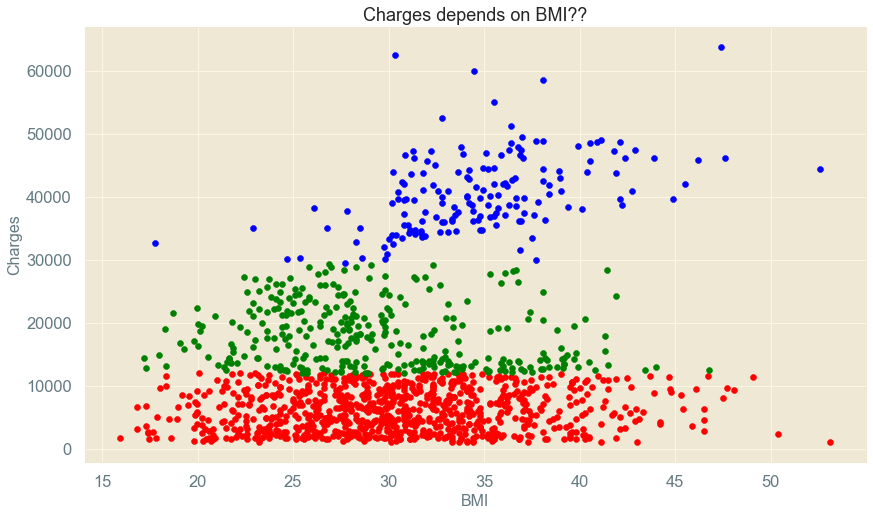

In [36]:
plt.figure(figsize=(14,8))
style.use("Solarize_Light2")
plt.scatter(x[y==0,0], x[y==0,1], color="red", label="A")
plt.scatter(x[y==1,0], x[y==1,1], color="blue", label="B")
plt.scatter(x[y==2,0], x[y==2,1], color="green", label="C")

plt.xlabel("BMI", fontsize=16)
plt.ylabel("Charges", fontsize=16)
plt.title("Charges depends on BMI??", fontsize=18)

From the above as we have defined we got 3 distinct clusters. With BMI (15 to 35) has a expense of \$10,000 to \$30,000 where as higher BMI's have much higher cost.

We also Run the same clustering for **"Age"**

In [37]:
age_charg_c=raw_data_std[:,[0,3]]
print(age_charg_c)
print(age_charg_c.shape)

[[-1.43876426  0.2985838 ]
 [-1.50996545 -0.95368917]
 [-0.79795355 -0.72867467]
 ...
 [-1.50996545 -0.96159623]
 [-1.29636188 -0.93036151]
 [ 1.55168573  1.31105347]]
(1338, 2)


In [38]:
wss=[]
sil=[]
for k in range(2,16):
    kmeans=KMeans(n_clusters=k, random_state=1, n_jobs=-2).fit(age_charg_c)
    wss.append(kmeans.inertia_)
    labels=kmeans.labels_
    silhoutte=silhouette_score(age_charg_c, labels, metric = 'euclidean')
    sil.append(silhoutte)

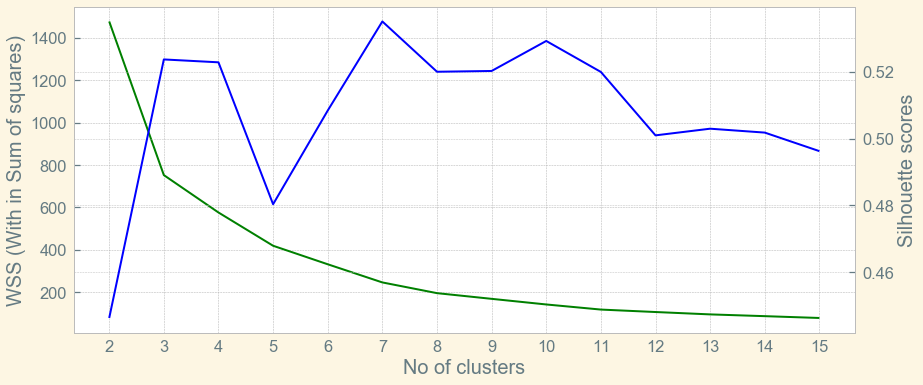

In [39]:
k=range(2,16)
style.use("bmh")
fig,ax=plt.subplots(figsize=(14,6))
ax.set_facecolor("white")
ax.plot(k, wss, color="green")
ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True))
ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS (With in Sum of squares)", fontsize=20)
ax2=ax.twinx()
ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)
ax2.grid(True,color="silver")
plt.show()

In [40]:
k=3
kmeans=KMeans(n_clusters=k, random_state=1).fit(age_charg_c)
clusters=kmeans.labels_
centrids=kmeans.cluster_centers_
raw_data["clusters"]=clusters
raw_data

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Normal,2
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Underweight,2
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Overweight,2
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Obese,2
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Obese,2
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661,Obese,0
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927,Underweight,2
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233,Underweight,2
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867,Normal,2


In [41]:
raw_data2=raw_data.sort_values(["clusters"]).copy()

In [42]:
for i in range(0,k+1):
    raw_data2["clusters"]=raw_data2["clusters"].replace(i, chr(i+65))
    
raw_data2

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat,clusters
1337,61,female,29.070,0,yes,northwest,29141.36030,Old,10.279914,Obese,A
895,61,female,44.000,0,no,southwest,13063.88300,Old,9.477607,Obese,A
894,62,male,32.110,0,no,northeast,13555.00490,Old,9.514511,Obese,A
892,54,male,24.035,0,no,northeast,10422.91665,Adult,9.251762,Obese,A
424,48,male,30.200,2,no,southwest,8968.33000,Adult,9.101455,Obese,A
...,...,...,...,...,...,...,...,...,...,...,...
413,25,male,23.900,5,no,southwest,5080.09600,Young Adult,8.533085,Normal,C
902,26,male,27.265,3,no,northeast,4661.28635,Young Adult,8.447047,Overweight,C
412,26,female,17.195,2,yes,northeast,14455.64405,Young Adult,9.578840,Overweight,C
1017,26,female,34.200,2,no,southwest,3987.92600,Young Adult,8.291027,Overweight,C


In [43]:
x=raw_data2.iloc[:,[0,6]].values
print(x.shape)
y=kmeans.fit_predict(x)
print(y.shape)

(1338, 2)
(1338,)


Text(0.5, 1.0, 'Charges depends on Age??')

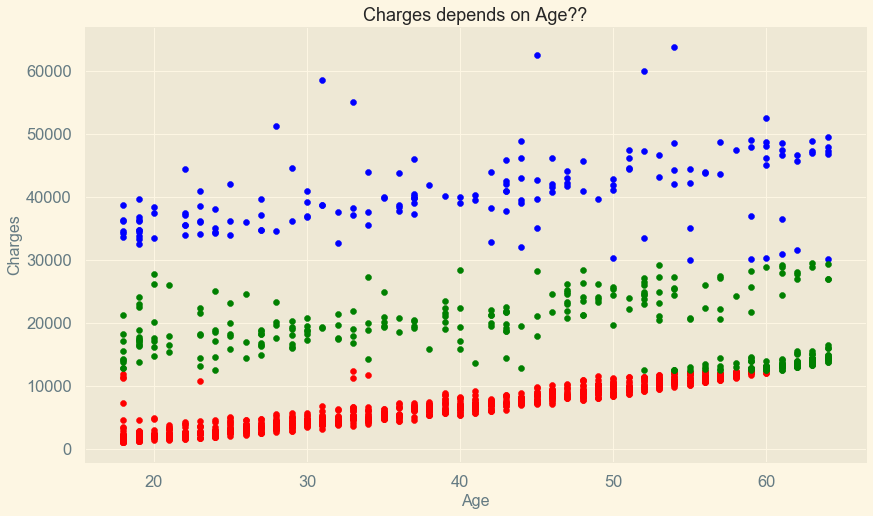

In [44]:
plt.figure(figsize=(14,8))
style.use("Solarize_Light2")
plt.scatter(x[y==0,0], x[y==0,1], color="red", label="A")
plt.scatter(x[y==1,0], x[y==1,1], color="blue", label="B")
plt.scatter(x[y==2,0], x[y==2,1], color="green", label="C")

plt.xlabel("Age", fontsize=16)
plt.ylabel("Charges", fontsize=16)
plt.title("Charges depends on Age??", fontsize=18)

We dont see much distinction about groups here with quite high overlaps. All the three expenses ranges has all the age groups

### PValue test 

We convert categorical variable "Smoker" as 0 and 1 or a continuous binary variable and run a OLS test

In [45]:
raw_data2["smoker"]=raw_data2["smoker"].replace(["yes", "no"],[1,0])

Dependent variable: Charges, Independent variable: BMI, age, children and smoker or non-smoker

### Hypothesis

$$H0 = "Charges are independent of the variables like age, bmi, no of childrens and smoking habits"$$
$$H1 = "Charges are dependent of the variables like age, bmi, no of childrens and smoking habits"$$

In [46]:
pval=ols("charges~bmi+age+children+smoker", data=raw_data).fit()
print(pval.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sat, 01 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:13:23   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.21e+04    941.984    -12.848

We do check that all the 4 independent variable has a **Pvalue of less than 0.05** thus we **reject the null hypothesis**.
and conclude that "Charges" are dependent on the mentioned variables.